# Simple XY plot for Time evolution of Gauss coefficients

This notebook generates time evolution plot of Gauss coefficients. The imput data file name is  [gauss_coef_prefix].dat.

## Initial setup

In [1]:
import sys
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from ctypes import *

Move current directory to directory with data to be averaged

In [2]:
%cd ./

/Volumes/Sources/matsui/Kemorin_MHD/MHD/pythons


Check if shared libraly to load is there

In [3]:
%ls -l "libcalypso_to_pythons.so"

-rwxr-xr-x  1 matsui  staff  225893 Jun 21 07:35 libcalypso_to_pythons.so*


Load dynamic library to run the program

In [4]:
libname = "libcalypso_to_pythons.so"
flib = cdll.LoadLibrary(libname)

## Go to data directory

Move current directory to directory with data to be averaged

In [5]:
cd ~/Desktop/sph_shell_275

/Users/matsui/Desktop/sph_shell_275


Check if data file to be averaged is there

In [6]:
ls -l

total 1858912
-rw-r--r--@ 1 matsui  staff    16168115 Feb  3  2020 Nusselt.dat
-rw-r--r--  1 matsui  staff         169 Jun 17 19:35 control_sph_time_average
-rw-r--r--  1 matsui  staff           0 Jun 17 22:22 fort.15
-rw-r--r--@ 1 matsui  staff    54896170 Feb  3  2020 gauss_coefs_Re.dat
-rw-r--r--@ 1 matsui  staff  1678130042 Feb  3  2020 picked_mode.dat
-rw-r--r--@ 1 matsui  staff    76516572 Feb  3  2020 sph_ave_volume.dat
-rw-r--r--@ 1 matsui  staff    76704980 Feb  3  2020 sph_pwr_volume_s.dat
-rw-r--r--  1 matsui  staff      228252 Jun 21 07:36 t_ave_picked_mode.dat
-rw-r--r--  1 matsui  staff      304336 Jun 21 07:36 t_rms_picked_mode.dat
-rw-r--r--  1 matsui  staff      532588 Jun 21 07:36 t_sigma_picked_mode.dat


## Set file name to read and check the avaiable Gauss coefficient modes
The file name is defined by [file_name]. The beginning part of the data file [file_name] is read and listed field or component names to be stored.

In [8]:
file_name = "gauss_coefs_Re.dat"
# Check time range and modes in data file
flib.check_gauss_coef_series_f.restype = c_void_p
flib.check_gauss_coef_series_f.argtypes = [c_char_p]

flib.check_gauss_coef_series_f(file_name.encode())

 Open file: gauss_coefs_Re.dat
 Start step and time:          100   2.0000000000000001E-004
 End step and time:     18800000   37.599999995310803     
 Saved Gauss coefficients at r =    2.8199999999999998      : 
           1 h1_1
           2 g1_0
           3 h3_1
           4 g3_0
           5 h3_2
           6 h3_3
           7 g1_1
           8 g3_1
           9 g3_2
          10 g3_3


1

In [9]:
start_time = 20.0
end_time =   25.0
# Load time series of the Gauss coefficients
flib.load_gauss_coefs_series_f.restype = c_void_p
flib.load_gauss_coefs_series_f.argtypes = [c_char_p, c_double, c_double]

n_step = flib.load_gauss_coefs_series_f(file_name.encode(),
                                       c_double(start_time), c_double(end_time))
print("# of time series: ", n_step)

 Open file: gauss_coefs_Re.dat
# of time series:  Start step and time:    20.000199998534899        25.000199994792901            25001
 25001


## Select Gauss coefficients names to be plotted
A list of component names are defined in 'field_name'. 
Time and data to be plotted are loaded into array 'time' and 'series', respectively.

In [10]:
# Set component name to be plotted
field_name = ["g1_0", 
              "g1_1", 
              "h1_1"]
n_line = len(field_name)

# Allocate time series data to read
i_step = np.zeros((n_step),dtype=np.int32)
time =   np.zeros((n_step),dtype=np.float64)
series = np.zeros((0),dtype=np.float64)
series_in = np.zeros((n_step),dtype=np.float64)

# Find compoenent address to plot
flib.get_gauss_coefs_time_f.restype = c_void_p
flib.get_gauss_coefs_time_f.argtypes = [c_int, np.ctypeslib.ndpointer(dtype=np.int32), 
                                              np.ctypeslib.ndpointer(dtype=np.float64)]
flib.get_gauss_coefs_time_f(c_int(n_step), i_step, time)

print(i_step[0], time[0])
print(i_step[n_step-1], time[n_step-1])

flib.get_each_gauss_coef_series_f.restype = c_void_p
flib.get_each_gauss_coef_series_f.argtypes = [c_char_p, c_int,
                                              np.ctypeslib.ndpointer(dtype=np.float64)]
icou = 0
print(field_name)
for eachh_field in field_name:
    print(eachh_field)
    flib.get_each_gauss_coef_series_f(eachh_field.encode(), c_int(n_step), series_in)
    series = np.append(series, series_in)
    icou = icou+1

10000100 20.0001999985349
12500100 25.0001999947929
['g1_0', 'g1_1', 'h1_1']
g1_0
 coef_nameg1_0                                                                                                                                                                                                                                                           
g1_1
 coef_nameg1_1                                                                                                                                                                                                                                                           
h1_1
 coef_nameh1_1                                                                                                                                                                                                                                                           


## Make a time evolution plot
The each time series data are expanded into each_series, and plotted into the line plot.
Please upgreade to more beautiful plot by yourself.

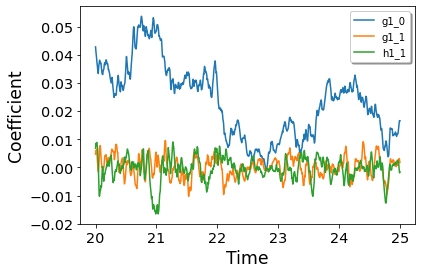

In [11]:
# Plot each component
for icou in range(n_line):
    plt.plot(time, series[icou*n_step:(icou+1)*n_step], label=(field_name[icou]))

# Set graph configurations
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.xlabel('Time', fontsize='xx-large')
plt.ylabel('Coefficient', fontsize='xx-large')
legend = plt.legend(loc='upper right', shadow=True, fontsize='medium')

# plt.savefig("picked.pdf")
plt.show()